In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv('data/mnist_train.csv')

In [3]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape

(60000, 785)

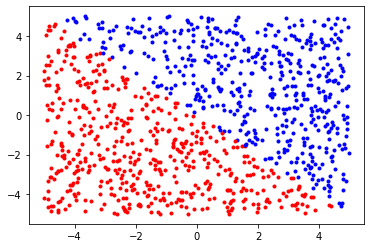

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def dummy_fn(x):
    """
        dummy_fn(ndarray) -> {0, 1}
        
        Simple function that assigns class to x as: y = sign(sum(x))
        
        Returns: y
            y: Class label {+1, -1}
    """
    if np.sum(x) == 0:
        return -1
    return np.sign(np.sum(x))
    
def complex_fn(x):
    """
        complex_fn(ndarray) -> {0, 1}
        
        Assigns class to x as 1{||x|| < 3}

        Returns: y
            y: Class label {+1, -1}
    """
    # Initialze the output
    y = 0
    
    y = 2 * (np.linalg.norm(x) < 3) - 1
    
    return y

def data_gen(n=100, f=dummy_fn, lims=[5, 5]):
    """
        data_gen(int, function, list) -> (ndarray, ndarray)
        
        Generates synthetic data by using the classification rule specified by
        the function f. 
        
        n: Number of data points to generate
        f: Function that takes a d-dimensional vector x as input and produces a
           the class label for that point {+1, -1}
        lims: lims[i] is used to get upper and lower limit on domain for the ith
              dimension. The ith dimension of x will be uniformly sampled from 
              the interval [-lim[i], lim[i]] for all examples
        Length of dims (=d) should be taken as the dimension of input vectors.              
    
        Returns: (X, Y)
            X: (n, d) Feature matrix
            Y: (n, 1) Label matrix    
    """
    # Some useful variables
    d = len(lims)
    
    # Intialize the data
    X = np.zeros((n, d))
    Y = np.zeros((n, 1))

    lims = np.asarray(lims)
    for i in range(n):
        x = 2 * lims * np.random.random((d,)) - lims
        y = f(x)
        X[i, :] = x
        Y[i, 0] = y
    
    return (X, Y)
    
    
    
if __name__ == '__main__':
    X, Y = data_gen(n=1000, f=dummy_fn)
    
    # Plot the generated data using matplotlib
    colors = ['r.', 'b.']
    for i in range(1000):
        plt.plot(X[i, 0], X[i, 1], colors[int((Y[i, 0] + 1) / 2)])
    plt.show()


In [6]:
X.shape

(1000, 2)

In [7]:
Y.shape

(1000, 1)

In [8]:
from tqdm import tqdm

In [9]:
class SupportVectorModel:
    def __init__(self) -> None:
        self.w = None
        self.b = None
    
    def _initialize(self, X) -> None:
        # initialize the parameters
        (N,D) = X.shape
        self.w = np.random.rand(D,1)
        self.b = np.random.rand()
        pass

    def fit(
            self, X, y, 
            learning_rate: float,
            num_iters: int,
            C: float = 1.0,
    ) -> None:
        self._initialize(X)
        
        # fit the SVM model using stochastic gradient descent
        for i in tqdm(range(1, num_iters + 1)):
            #print(i)
            # sample a random training example
            rand_idx = np.random.choice(X.shape[0])
            xn = X[rand_idx, :].reshape(-1,1)
            yn = y[rand_idx]

            hinge_loss = max(0,1-yn*(np.dot(np.transpose(xn),self.w)+self.b))
            delW = np.zeros(self.w.shape)
            delb = 0
            if hinge_loss > 0:
                delW = self.w + C*(-yn*xn)
                delb = C*(-yn)

            self.w = self.w - learning_rate*delW
            self.b = self.b - learning_rate*delb 

        return None
        raise NotImplementedError
    
    def predict(self, X) -> np.ndarray:
        # make predictions for the given data
        pred = X@self.w + self.b
        pred[pred>=0] = 1
        pred[pred<0] = -1
        
        return pred
        raise NotImplementedError

    def accuracy_score(self, X, y) -> float:
        # compute the accuracy of the model (for debugging purposes)
        return np.mean(self.predict(X) == y)

In [10]:
model = SupportVectorModel()
model.fit(X,Y,0.1,100)

100%|██████████| 100/100 [00:00<00:00, 12190.97it/s]


In [11]:
model.accuracy_score(X,Y)

0.964

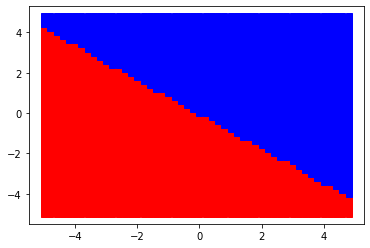

In [12]:
n, d = X.shape
    
    # Obtain the minimum and maximum coordinates
x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
y_min = np.min(X[:, 1])
y_max = np.max(X[:, 1])
colors = ['rs', 'bs']
for x in np.arange(x_min, x_max, 0.2).tolist():
    for y in np.arange(y_min, y_max, 0.2).tolist():
    
        label = model.predict(np.asarray([[x, y]]))
        plt.plot(x, y, colors[int((label + 1) / 2)])
plt.show()


In [13]:
import numpy as np

# Generate class 0 data
np.random.seed(0)
class0_data = np.random.normal(loc=[-2, 0], scale=[0.5, 0.5], size=(500, 2))

# Generate class 1 data
np.random.seed(1)
class1_data = np.random.normal(loc=[0, 2], scale=[0.5, 0.5], size=(500, 2))

# Generate class 2 data
np.random.seed(2)
class2_data = np.random.normal(loc=[2, 0], scale=[0.5, 0.5], size=(500, 2))


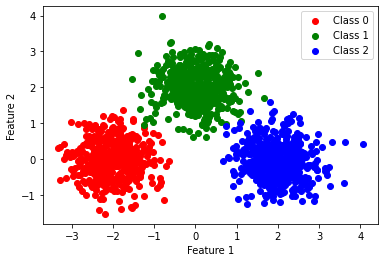

In [14]:
import matplotlib.pyplot as plt

# Plot class 0 data
plt.scatter(class0_data[:, 0], class0_data[:, 1], color='red', label='Class 0')

# Plot class 1 data
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='green', label='Class 1')

# Plot class 2 data
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='blue', label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [15]:
# Combine the data points into a single dataset
data = np.vstack([class0_data, class1_data, class2_data])

# Create labels for the data points
labels = np.concatenate([np.zeros(500), np.ones(500), np.full(500, 2)])

# Shuffle the data and labels
np.random.seed(3)
shuffle_indices = np.random.permutation(len(data))
data = data[shuffle_indices]
labels = labels[shuffle_indices]


In [16]:
data.shape

(1500, 2)

In [17]:
labels.shape

(1500,)

In [29]:
class SupportVectorModel:
    def __init__(self) -> None:
        self.w = None
        self.b = None
    
    def _initialize(self, X) -> None:
        # initialize the parameters
        (N,D) = X.shape
        self.w = np.zeros((D,1))
        self.b = 0.0
        pass

    def fit(
            self, X, y, 
            learning_rate: float,
            num_iters: int,
            C: float = 1.0,
    ) -> None:
        self._initialize(X)

        # fit the SVM model using stochastic gradient descent
        for i in tqdm(range(1, num_iters + 1)):
            # sample a random training example
            rand_idx = np.random.choice(X.shape[0])
            xn = X[rand_idx, :].reshape(-1,1)
            yn = y[rand_idx]

            hinge_loss = max(0,1-yn*(np.dot(np.transpose(xn),self.w)+self.b))
            delW = self.w
            delb = 0
            if hinge_loss > 0:
                delW = self.w + C*(-yn*xn)
                delb = C*(-yn)

            self.w = self.w - learning_rate*delW
            self.b = self.b - learning_rate*delb 

        return None
        raise NotImplementedError
    
    def predict(self, X) -> np.ndarray:
        # make predictions for the given data
        pred = X@self.w + self.b
        pred[pred>=0] = 1
        pred[pred<0] = -1
        
        return pred
        raise NotImplementedError

    def accuracy_score(self, X, y) -> float:
        # compute the accuracy of the model (for debugging purposes)
        return np.mean(self.predict(X) == y)
    
    def precision_score(self, X, y) -> float:
        y_pred = self.predict(X)
        tp = np.sum((y==1) & (y_pred==1))
        predp = np.sum(y_pred==1)
        #print(tp,predp)
        eps = 1e-7
        precision_label = tp/(predp+eps)
        
        return precision_label
    
    def recall_score(self, X, y) -> float:
        y_pred = self.predict(X)
        tp = np.sum((y==1) & (y_pred==1))
        predp = np.sum(y==1)
        eps = 1e-7
        recall_label = tp/(predp+eps)
        
        return recall_label
    
    def f1_score(self, X, y) -> float:
        precision = self.precision_score(X,y)
        recall = self.recall_score(X,y)
        eps = 1e-7
        return 2 * (precision * recall) / (precision + recall+eps)

class MultiClassSVM:
    def __init__(self, num_classes: int) -> None:
        self.num_classes = num_classes
        self.models = []
        for i in range(self.num_classes):
            self.models.append(SupportVectorModel())
    
    def fit(self, X, y, **kwargs) -> None:
        # first preprocess the data to make it suitable for the 1-vs-rest SVM model
        # then train the 10 SVM models using the preprocessed data for each class

        for label in range(self.num_classes):
            X_train = X
            y_train = y.copy()
            y_train[y==label] = 1
            y_train[y!=label] = -1
            self.models[label].fit(X_train,y_train,kwargs['learning_rate'],kwargs['num_iters'],kwargs['C'])
        return None
        raise NotImplementedError

    def predict(self, X) -> np.ndarray:
        result = np.zeros((X.shape[0],self.num_classes))
        for label in range(self.num_classes):
             result[:,label] = np.squeeze(X@self.models[label].w + self.models[label].b)

        return np.argmax(result,axis = 1).reshape(-1,1)
        # pass the data through all the 10 SVM models and return the class with the highest score
        raise NotImplementedError

    def accuracy_score(self, X, y) -> float:
        return np.mean(self.predict(X) == y)
    
    def precision_score(self, X, y) -> float:
        y_pred = self.predict(X)
        #print(y.shape,y_pred.shape)
        precision = 0.0
        eps = 1e-7
        for label in range(self.num_classes):
            tp = np.sum((y==label) & (y_pred==label))
            predp = np.sum(y_pred==label)
            precision_label = tp/(predp+eps)

            precision = precision+precision_label

        return precision/self.num_classes
        raise NotImplementedError
    
    def recall_score(self, X, y) -> float:
        y_pred = self.predict(X)
        recall = 0.0
        eps = 1e-7
        for label in range(self.num_classes):
            tp = np.sum((y==label) & (y_pred==label))
            predp = np.sum(y==label)
            recall_label = tp/(predp+eps)

            recall = recall + recall_label

        return recall/self.num_classes
        
    def f1_score(self, X, y) -> float:
        precision = self.precision_score(X,y)
        recall = self.recall_score(X,y)
        eps = 1e-7
        return 2 * (precision * recall) / (precision + recall + eps)
        raise NotImplementedError


In [30]:
X_train = data
y_train = labels

In [31]:
svm = MultiClassSVM(num_classes=3)

        # fit the model
svm.fit(
            X_train, y_train, C=6,
            learning_rate=0.2,
            num_iters=300,
        )

        # evaluate the model

100%|██████████| 300/300 [00:00<00:00, 35199.91it/s]


In [32]:
y_train = y_train.reshape(-1,1)
print(svm.accuracy_score(X_train, y_train))
print(svm.precision_score(X_train,y_train))
print(svm.recall_score(X_train,y_train))
print(svm.f1_score(X_train,y_train))

0.9446666666666667
0.9525443108404382
0.9446666664777332
0.9485890837891828


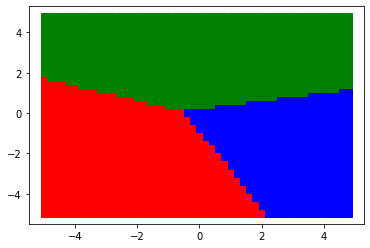

In [33]:
n, d = X_train.shape
    
    # Obtain the minimum and maximum coordinates
x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
y_min = np.min(X[:, 1])
y_max = np.max(X[:, 1])
colors = ['red', 'green', 'blue', 'c', 'm', 'y', 'k', 'w', '#FFA500', '#800080']
for x in np.arange(x_min, x_max, 0.2).tolist():
    for y in np.arange(y_min, y_max, 0.2).tolist():
        label = svm.predict(np.asarray([[x, y]]))
        plt.plot([x], [y], colors[int(label)], marker = 's')
plt.show()


In [4]:
train_df = pd.read_csv('data/mnist_train.csv')
test_df = pd.read_csv('data/mnist_test.csv')

X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values


In [5]:
def normalize(X_train, X_test) -> Tuple[np.ndarray, np.ndarray]:
    # normalize the data

    X_train_min = np.min(X_train, axis = 0)
    X_train_max = np.max(X_train, axis = 0)
    den = X_train_max - X_train_min
    den[den==0] = 1
    X_train_norm = 2*((X_train-X_train_min)/den)-1

    X_test_min = np.min(X_test, axis = 0)
    X_test_max = np.max(X_test, axis = 0)
    den = X_test_max - X_test_min
    den[den==0] = 1
    X_test_norm = 2*((X_test-X_test_min)/den)-1

    return (X_train_norm,X_test_norm)
X_train,X_test = normalize(X_train,X_test)

In [8]:
class PCA:
    def __init__(self, n_components: int) -> None:
        self.n_components = n_components
        self.components = None
    
    def fit(self, X) -> None:
        # fit the PCA model
        S = np.cov(X, rowvar=False)
        #unique, counts = np.unique(S, return_counts=True)

        #print(np.asarray((unique, counts)).T)
        eigenValues, eigenVectors = np.linalg.eig(S)
        idx = eigenValues.argsort()[::-1] # eigenValues in decreasing order
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]

        # Largest n_components eigen values
        self.components = eigenVectors[:,0:self.n_components]

        return None
        raise NotImplementedError
    
    def transform(self, X) -> np.ndarray:
        # transform the data
        
        X_transform = X @ self.components
        S = np.cov(X_transform, rowvar=False)
        eigenValues, eigenVectors = np.linalg.eig(S)
        print(S)
        print(eigenValues)
        return X @ self.components
        raise NotImplementedError

    def fit_transform(self, X) -> np.ndarray:
        # fit the model and transform the data
        self.fit(X)
        return self.transform(X)



In [9]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

[[2.04674923e+01 9.42669074e-17]
 [9.42669074e-17 1.49655638e+01]]
[20.46749228 14.96556378]
[[21.10596246  0.20817486]
 [ 0.20817486 15.87876285]]
[21.11423998 15.87048533]


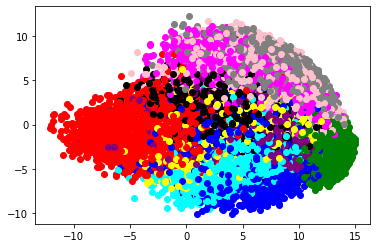

In [168]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'purple', 'pink']
for i in range(60000):
    #print(X_train[i,0],X_train[i,1],str(colors[int(y_train[i])]))
    plt.plot(X_train[i, 0], X_train[i, 1], 'o',color = colors[int(y_train[i])])

In [76]:
from sklearn.svm import SVC
model = SVC(C=1, kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [77]:
from sklearn import metrics
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.4507 



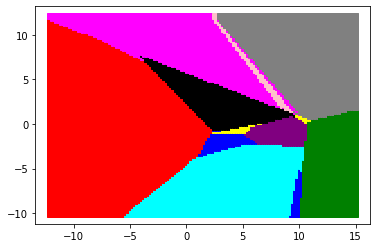

In [134]:
n, d = X_train.shape
    
    # Obtain the minimum and maximum coordinates
x_min = np.min(X_train[:, 0])
x_max = np.max(X_train[:, 0])
y_min = np.min(X_train[:, 1])
y_max = np.max(X_train[:, 1])
#colors = ['rs', 'bs', 'ys']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'purple', 'pink']
for x in np.arange(x_min, x_max, 0.2).tolist():
    for y in np.arange(y_min, y_max, 0.2).tolist():
        label = model.predict(np.asarray([[x, y]]))
        plt.plot(x, y, colors[int(label)],marker = 's')
plt.show()


In [58]:
svm = MultiClassSVM(num_classes=10)

        # fit the model
svm.fit(
            X_train, y_train.reshape(-1,1), C=5,
            learning_rate=0.0001,
            num_iters=100000,
        )

100%|██████████| 100000/100000 [00:03<00:00, 25173.15it/s]


In [510]:
svm.predict(X_train).shape

(60000, 1)

In [59]:
y_train = y_train.reshape(-1,1)
print(svm.accuracy_score(X_train, y_train))
print(svm.precision_score(X_train,y_train))
print(svm.recall_score(X_train,y_train))
print(svm.f1_score(X_train,y_train))

0.33713333333333334
0.26248746941769163
0.33388430658143947
0.293912071443726


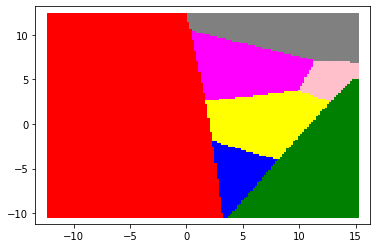

In [60]:
n, d = X_train.shape
    
    # Obtain the minimum and maximum coordinates
x_min = np.min(X_train[:, 0])
x_max = np.max(X_train[:, 0])
y_min = np.min(X_train[:, 1])
y_max = np.max(X_train[:, 1])
#colors = ['rs', 'bs', 'ys']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'purple', 'pink']
for x in np.arange(x_min, x_max, 0.2).tolist():
    for y in np.arange(y_min, y_max, 0.2).tolist():
        label = svm.predict(np.asarray([[x, y]]))
        plt.plot(x, y, colors[int(label)],marker = 's')
plt.show()


In [124]:
y_train = y_train.reshape(-1,1)
label = 0
y = y_train.copy()
y[y_train==label] = 1
y[y_train!=label] = -1
model = SupportVectorModel()
model.fit(X_train,y,0.1,10000,5)

100%|██████████| 10000/10000 [00:00<00:00, 32997.90it/s]


In [125]:
print(model.accuracy_score(X_train,y))
print(model.precision_score(X_train,y))
print(model.recall_score(X_train,y))
print(model.f1_score(X_train,y))

0.9137833333333333
0.5827084252187317
0.44605774100209256
0.5053074004278483


In [89]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   -1 54077]
 [    1  5923]]


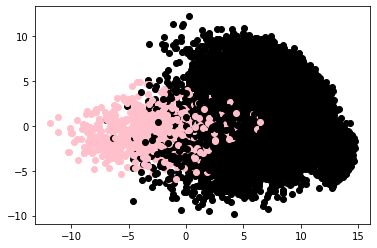

In [90]:
colors = ['black', 'pink']
for i in range(10000):
    #print(X_train[i,0],X_train[i,1],str(colors[int(y_train[i])]))
    plt.plot(X_train[i, 0], X_train[i, 1], 'o',color = colors[int((y[i]+1)/2)])

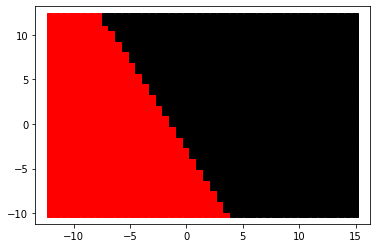

In [101]:
n, d = X_train.shape
    
    # Obtain the minimum and maximum coordinates
x_min = np.min(X_train[:, 0])
x_max = np.max(X_train[:, 0])
y_min = np.min(X_train[:, 1])
y_max = np.max(X_train[:, 1])
#colors = ['rs', 'bs', 'ys']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'purple', 'pink']
for x in np.arange(x_min, x_max, 0.6).tolist():
    for yy in np.arange(y_min, y_max, 0.6).tolist():
        pred = model.predict(np.asarray([[x, yy]]))
        color = 'black'
        if pred == 1:
            color = colors[label]
        plt.plot(x, yy, color = color,marker = 's')
plt.show()


(-10.0, 15.0)

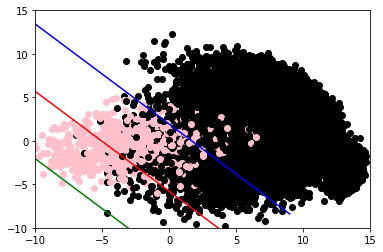

In [123]:
# C = 0.5

colors = ['black', 'pink']
for i in range(10000):
    #print(X_train[i,0],X_train[i,1],str(colors[int(y_train[i])]))
    plt.plot(X_train[i, 0], X_train[i, 1], 'o',color = colors[int((y[i]+1)/2)])
w = model.w
w1 = w[0]
w2 = w[1]
b = model.b

X = np.arange(-10,10)
plt.plot(X,(-b-w1*X)/w2,color = 'r') # wTx+b = 0
plt.plot(X,(1-b-w1*X)/w2,color = 'g') # wTx+b = 1
plt.plot(X,(-1-b-w1*X)/w2,color = 'b') # wTx+b = 2
plt.xlim((-10,15))
plt.ylim((-10,15))

(-10.0, 15.0)

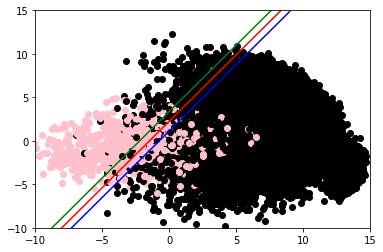

In [126]:
# C = 10

colors = ['black', 'pink']
for i in range(10000):
    #print(X_train[i,0],X_train[i,1],str(colors[int(y_train[i])]))
    plt.plot(X_train[i, 0], X_train[i, 1], 'o',color = colors[int((y[i]+1)/2)])
w = model.w
w1 = w[0]
w2 = w[1]
b = model.b

X = np.arange(-10,10)
plt.plot(X,(-b-w1*X)/w2,color = 'r')
plt.plot(X,(1-b-w1*X)/w2,color = 'g')
plt.plot(X,(-1-b-w1*X)/w2,color = 'b')
plt.xlim((-10,15))
plt.ylim((-10,15))